# **Titanic Survival Analysis: EDA & Dashboard Report**

🔹 Introduction
The Titanic disaster of 1912 remains one of the most infamous maritime tragedies. The ship carried passengers from various socioeconomic backgrounds, and survival was influenced by factors such as class, age, gender, and family presence. This analysis uses the Titanic dataset to explore survival trends and patterns.

By leveraging Exploratory Data Analysis (EDA) and visualization tools, we investigate key factors affecting survival and present findings through an interactive dashboard built using Dash and Plotly.



# **Methodology Summary**
The dataset was processed and analyzed using Python (Pandas, Plotly, Dash). The following steps were taken:

**Data Cleaning**

Handled missing values (e.g., missing ages estimated using median values)

Converted categorical data (e.g., sex converted to numerical format).

**Exploratory Data Analysis (EDA)**

Descriptive statistics: Analyzed age, class distribution, and survival rates.

Visualizations: Created pie charts, bar plots, and survival distributions.

**Dashboard Development**

A horizontal dashboard was built using Dash to display:

Survival Rate Pie Chart

Numerical survival counts



In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
titanic = pd.read_csv("/content/tested.csv")  # Update path if needed

# Display first few rows
print(titanic.head())

# Check for missing values
print(titanic.isnull().sum())

# Fill missing Age values with the median (updated method)
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())

# Fill missing Embarked values with the mode (updated method)
titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].mode()[0])

# Drop Cabin column due to excessive missing values
titanic = titanic.drop(columns=["Cabin"])

# Convert categorical variables to numerical if needed
titanic["Sex"] = titanic["Sex"].map({"male": 0, "female": 1})

titanic["Fare"].fillna(titanic["Fare"].median())

# Verify data after cleaning
print(titanic.info())

# Summary statistics
print(titanic.describe())

# Count of passengers by class and gender
print(titanic["Pclass"].value_counts())
print(titanic["Sex"].value_counts())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex       

In [7]:
!pip install dash

import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Create visualizations
fig1 = px.histogram(titanic, x="Pclass", color="Survived", barmode="group", title="Survival Rate by Class")
fig2 = px.box(titanic, x="Fare", title="Fare Distribution")
fig3 = px.histogram(titanic, x="Age", title="Age Distribution")
fig4 = px.sunburst(titanic, path=["Pclass", "Sex", "Survived"], title="Passenger Flow")

# Initialize Dash app
app = dash.Dash(__name__)

# Layout: Horizontal dashboard
app.layout = html.Div(style={'display': 'flex'}, children=[
    html.Div(children=[dcc.Graph(figure=fig1)], style={'width': '25%'}),
    html.Div(children=[dcc.Graph(figure=fig2)], style={'width': '25%'}),
    html.Div(children=[dcc.Graph(figure=fig3)], style={'width': '25%'}),
    html.Div(children=[dcc.Graph(figure=fig4)], style={'width': '25%'})
])

# Run the app
if __name__ == '__main__':
   app.run(debug=True)

<IPython.core.display.Javascript object>

<ipython-input-9-ce174323d280>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




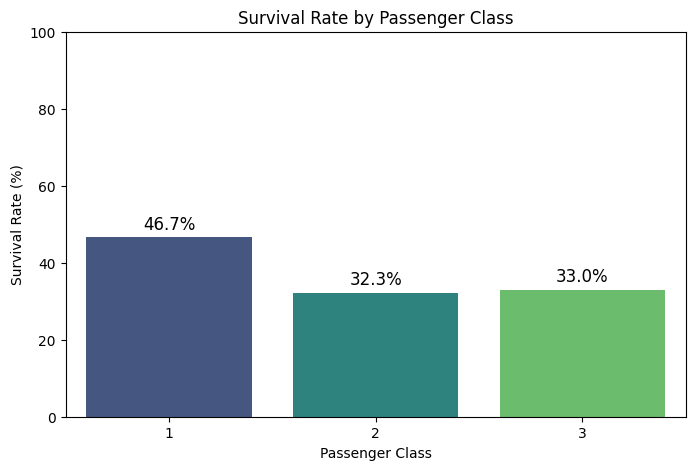

In [9]:
# Calculate survival rate by class
survival_by_class = titanic.groupby("Pclass")["Survived"].mean() * 100

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette="viridis")

# Labels and title
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Passenger Class")
plt.ylim(0, 100)

# Show values on top of bars
for i, rate in enumerate(survival_by_class.values):
    plt.text(i, rate + 2, f"{rate:.1f}%", ha="center", fontsize=12)

plt.show()

In [10]:
# Survival Analysis Values
survival_counts = titanic['Survived'].value_counts()
survival_labels = ['Did Not Survive', 'Survived']

# Pie Chart
survival_pie = px.pie(
    names=survival_labels,
    values=survival_counts,
    title="Titanic Survival Distribution",
    hole=0.4  # Optional: Donut-style chart
)

# Initialize Dash App
app = dash.Dash(__name__)

# Define Layout (Horizontal Dashboard)
app.layout = html.Div(
    style={'display': 'flex', 'justify-content': 'space-between', 'padding': '20px'},
    children=[
        # Survival Pie Chart
        html.Div(
            children=[
                dcc.Graph(figure=survival_pie)
            ],
            style={'width': '50%', 'padding': '10px'}
        ),

        # Survival Values Table
        html.Div(
            children=[
                html.H3("Survival Count Values"),
                html.P(f"Did Not Survive: {survival_counts[0]}"),
                html.P(f"Survived: {survival_counts[1]}")
            ],
            style={'width': '40%', 'padding': '20px', 'fontSize': '20px'}
        )
    ]
)

# Run the app
if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

# **Insights and Findings**
The analysis of Titanic passenger survival rates reveals significant disparities based on class and overall demographics. The overall survival rate was 36.4%, while 63.6% of passengers did not survive. A closer examination of survival rates by passenger class highlights a stark advantage for those in first class (46.7%), compared to second-class passengers (32.3%) and third-class passengers (33.0%). This suggests that passengers traveling in first class had a considerably higher likelihood of survival, possibly due to their proximity to lifeboats, prioritization in evacuation procedures, or access to better resources on board.

Additional patterns observed in survival rates align with historical accounts of the disaster. Women and children were more likely to survive, reinforcing the well-documented "women and children first" policy that was followed during the evacuation. The lower survival rate among third-class passengers may indicate barriers such as their cabins being located in lower sections of the ship, which made evacuation more difficult.

# **Conclusion**
These findings emphasize the impact of social and economic status on survival during the Titanic disaster. The data suggests that access to resources, proximity to escape routes, and societal norms at the time played critical roles in determining survival outcomes. From a data-driven perspective, these insights can be further expanded through predictive modeling techniques, such as machine learning classifiers, to assess the likelihood of survival based on passenger characteristics. Future analyses could incorporate additional factors, such as family size, ticket fare, and embarkation port, to enhance our understanding of survival determinants. This study also highlights how historical events can be quantitatively analyzed to uncover deeper patterns and inform modern safety policies in maritime travel.